In [6]:
# 1️⃣ ربط Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1.Exploring Data**



In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from src.wrangle import wrangle

## preparing data

In [105]:
#data wrangling
df=wrangle("data/SCFP2019.csv")
print(df.shape)
df.head()

(28885, 351)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


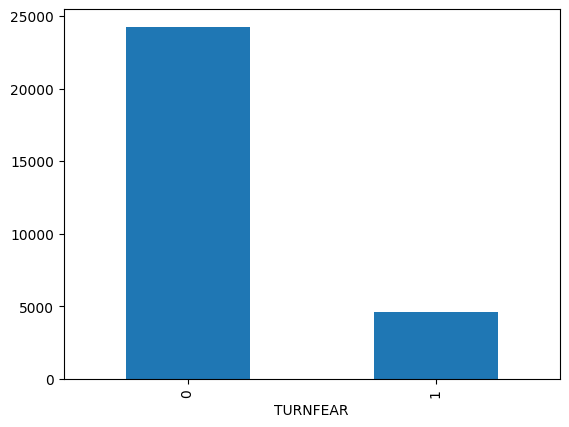

In [106]:
#explore TURNFEAR column
df["TURNFEAR"].value_counts().plot(kind="bar");



 Use amask to subset create df to only households that have been turned down or feared being turned down for credit

In [107]:
mask =df["TURNFEAR"] ==1
df_turnfear=df[mask]
df_turnfear.shape


(4623, 351)

## Eplore

### AGE & AGECL




In [108]:
#get number of unique values in AGCEL
print (f"number of groups = {df_turnfear["AGECL"].nunique()}")
#get the unique catigories it self
print (f"groups names: {df_turnfear["AGECL"].unique()}")

number of groups = 6
groups names: [3 5 1 2 4 6]


In [109]:
fig =px.line(df_turnfear["AGE"].value_counts().sort_index(),
    title="AGE Distribution"
    )
fig.update_layout(xaxis_title="Age",yaxis_title="frequancy")
fig.show()


convert AGECL groups to what it is mean based on the Data dict on "data/SCF Combined Extract Data"

In [110]:
agecl_dict = {
    1: "Under 35",
    2: "35-44",
    3: "45-54",
    4: "55-64",
    5: "65-74",
    6: "75 or Older",
}

age_cl=df["AGECL"].replace(agecl_dict)

#print results
print("age_cl shape:", age_cl.shape)
age_cl.head()

age_cl shape: (28885,)


,AGECL
0,75 or Older
1,75 or Older
2,75 or Older
3,75 or Older
4,75 or Older


 Create a bar chart showing the value counts from age_cl and  Create a histogram of the "AGE" column with 10 bins

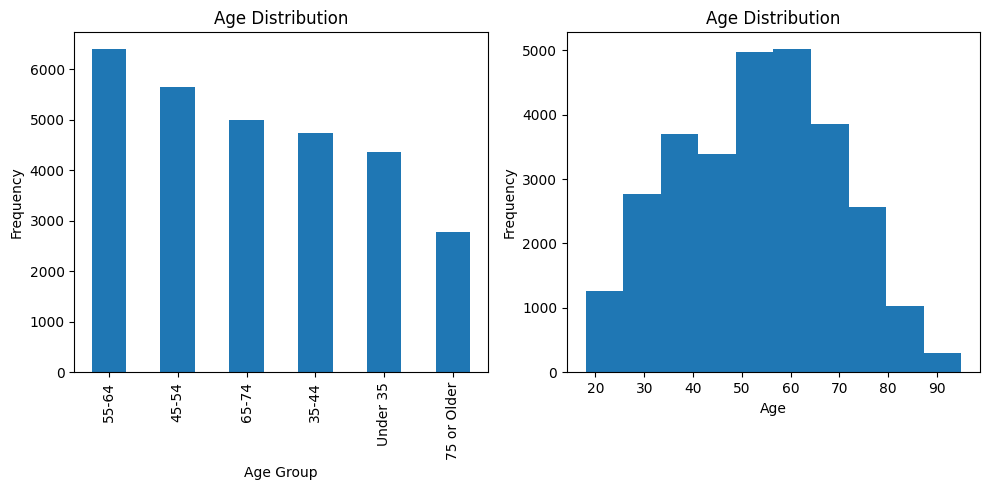

In [111]:
fig,ax =plt.subplots(1,2,figsize=(10,5))

#creat a bar chart for age_cl
age_cl.value_counts().plot(kind="bar",ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_xlabel("Age Group")
ax[0].set_ylabel("Frequency")
#create hist for age
ax[1].hist(df["AGE"],bins=10)
ax[1].set_title("Age Distribution")
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are *most* concerned seem to be between 30 and 40.

### RACE

In [112]:
#get RACE column groups
print(f"RACE groups is: {df_turnfear["RACE"].unique()}")

RACE groups is: [1 3 2 5]


convert RACE groups to what it is mean based on the Data dict on "data/SCF Combined Extract Data"

In [113]:
#create race dict
race_dict = {
    1: "White/Non-Hispanic",
    2: "Black/African-American",
    3: "Hispanic",
    5: "Other",
}
#convert race column
race=df_turnfear["RACE"].replace(race_dict)

#print new data
print (race.shape)
race.head()



(4623,)


,RACE
5,White/Non-Hispanic
6,White/Non-Hispanic
7,White/Non-Hispanic
8,White/Non-Hispanic
9,White/Non-Hispanic


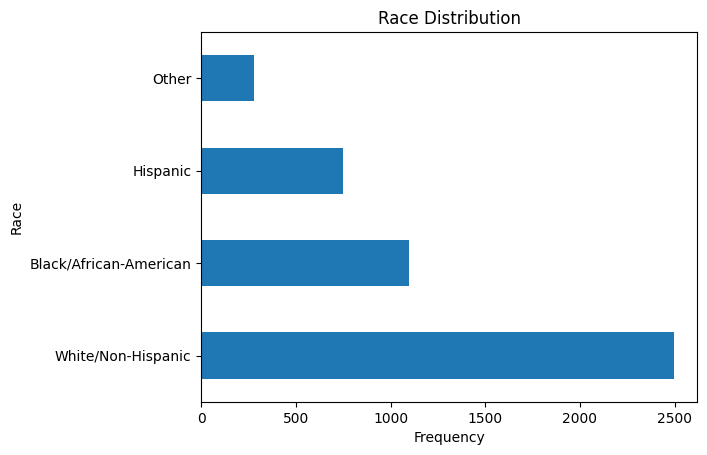

In [114]:
#plot the distribution of each race groups
race.value_counts().plot(kind="barh")
plt.title("Race Distribution")
plt.xlabel("Frequency")
plt.ylabel("Race")
plt.show();

This suggests that White/Non-Hispanic people worry more about being denied credit, but thinking critically about what we're seeing, that might be because there are more White/Non-Hispanic in the population of the United States than there are other racial groups, and the sample for this survey was specifically drawn to be representative of the population as a whole.


now lets see the distribution of all people in US based on RACE feature

(28885,)


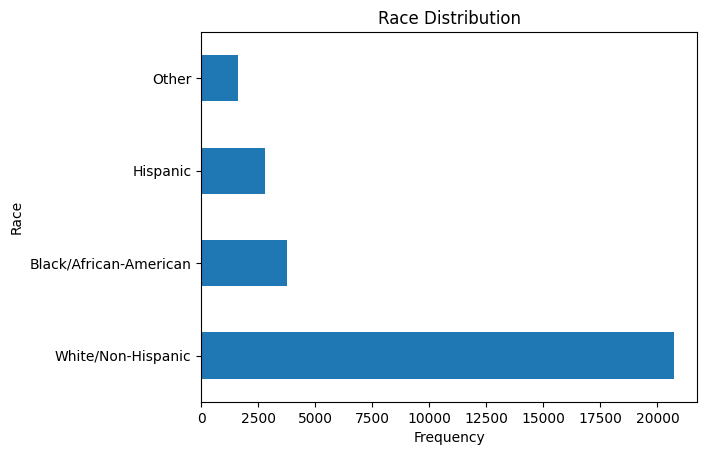

In [115]:
#convet race column
race_all =df["RACE"].replace(race_dict)
print(race_all.shape)
#plot the all people distribution
race_all.value_counts().plot(kind="barh")
plt.title("Race Distribution")
plt.xlabel("Frequency")
plt.ylabel("Race")
plt.show();

How does this second bar chart change our perception of the first one? On the one hand, we can see that White Non-Hispanics account for around 70% of whole dataset, but only 54% of credit fearful respondents. On the other hand, Black and Hispanic respondents represent 23% of the whole dataset but 40% of credit fearful respondents. In other words, Black and Hispanic households are actually *more* likely to be in the credit fearful group.

## INCCAT


In [116]:
#get inccat number of groups
print(f"number of groups = {df["INCCAT"].nunique()}")
#get inccat groups names
print (f"groups names: {df["INCCAT"].unique()}")
#get each group count
print(f"each group count: {df["INCCAT"].value_counts()}")

number of groups = 6
groups names: [3 2 4 1 6 5]
each group count: INCCAT
6    7439
4    4855
1    4737
3    4531
2    4483
5    2840
Name: count, dtype: int64


 Create a DataFrame df_inccat that shows the normalized frequency for income categories for both the credit fearful and non-credit fearful households in the dataset.

In [117]:
#inccat_dict
inccat_dict = {
    1: "0-20",
    2: "21-39.9",
    3: "40-59.9",
    4: "60-79.9",
    5: "80-89.9",
    6: "90-100",
}

#data frame
df_inccat=(
    df["INCCAT"]
    .replace(inccat_dict)
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()
)
df_inccat

,TURNFEAR,INCCAT,Frequency
0,0,90-100,0.297296
1,0,60-79.9,0.174841
2,0,40-59.9,0.143146
3,0,0-20,0.140343
4,0,21-39.9,0.135933
5,0,80-89.9,0.108441
6,1,0-20,0.288125
7,1,21-39.9,0.256327
8,1,40-59.9,0.228856
9,1,60-79.9,0.132598


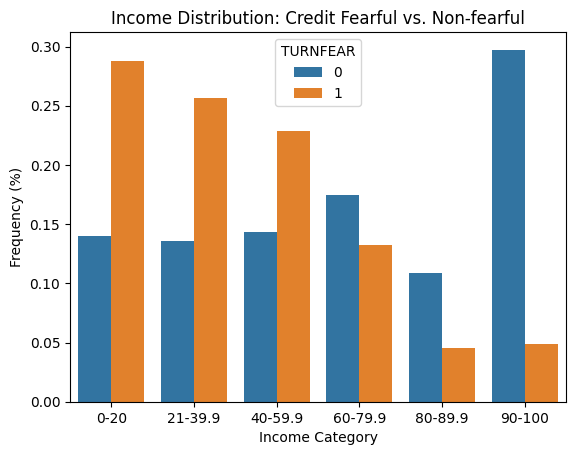

In [118]:
#create a sid by sid bar chart for income
sns.barplot(data=df_inccat,x="INCCAT",y="Frequency",hue="TURNFEAR",order=inccat_dict.values())
plt.xlabel("Income Category")
plt.ylabel("Frequency (%)")
plt.title("Income Distribution: Credit Fearful vs. Non-fearful");

Comparing the income categories across the fearful and non-fearful groups, we can see that credit fearful households are much more common in the lower income categories. In other words, the credit fearful have lower incomes.


EDUC

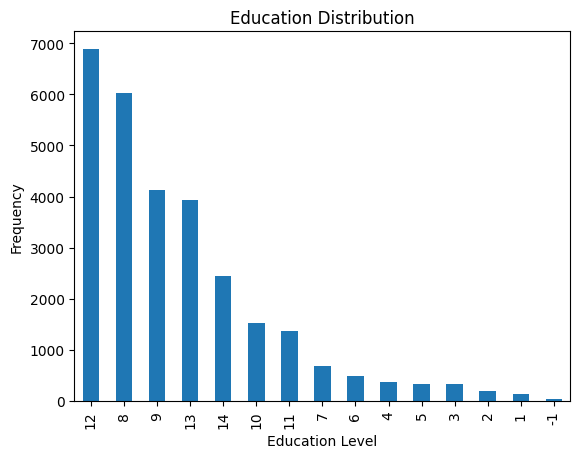

In [122]:
# exploring education columns
df["EDUC"].value_counts().plot(kind="bar")
plt.title("Education Distribution")
plt.xlabel("Education Level")
plt.ylabel("Frequency")
plt.show();

Create a DataFrame df_educ that shows the normalized frequency for education categories for both the credit fearful and non-credit fearful households in the dataset

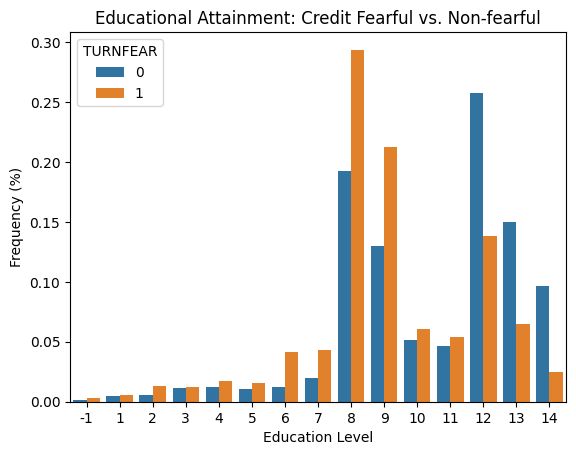

In [126]:
df_educ=(
    df["EDUC"]
    .groupby(df["TURNFEAR"])
    .value_counts(normalize=True)
    .rename("Frequency")
    .to_frame()
    .reset_index()

)

#create a side by side bar chart
sns.barplot(
    data=df_educ,
    x="EDUC",
    y="Frequency",
    hue="TURNFEAR"
)
plt.xlabel("Education Level")
plt.ylabel("Frequency (%)")
plt.title("Educational Attainment: Credit Fearful vs. Non-fearful");

we can see that a much higher proportion of credit-fearful respondents have only a high school diploma, while university degrees are more common among the non-credit fearful.

## "ASSET", "HOUSES", "INCOME", "DEBT" and "EDUC"

make a corrolation matrix betwean these columns

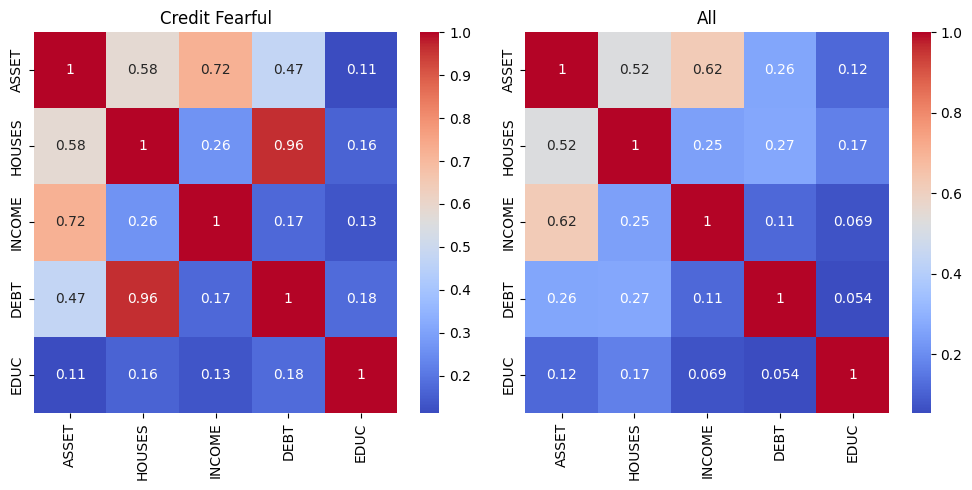

In [129]:
cols = ["ASSET", "HOUSES", "INCOME", "DEBT", "EDUC"]

cols_corr_fear=df_turnfear[cols].corr()
cols_corr=df[cols].corr()

fig ,ax=plt.subplots(1,2,figsize=(10,5))
sns.heatmap(cols_corr_fear,annot=True,cmap="coolwarm",ax=ax[0])
ax[0].set_title("Credit Fearful")
sns.heatmap(cols_corr,annot=True,cmap="coolwarm",ax=ax[1])
ax[1].set_title("All")
plt.tight_layout()
plt.show()



There are some pretty important differences here! The relationship between "DEBT" and "HOUSES" is positive for both datasets, but while the coefficient for df is fairly weak at 0.26, the same number for df_fear is 0.96.

## DEBT and ASSET relation

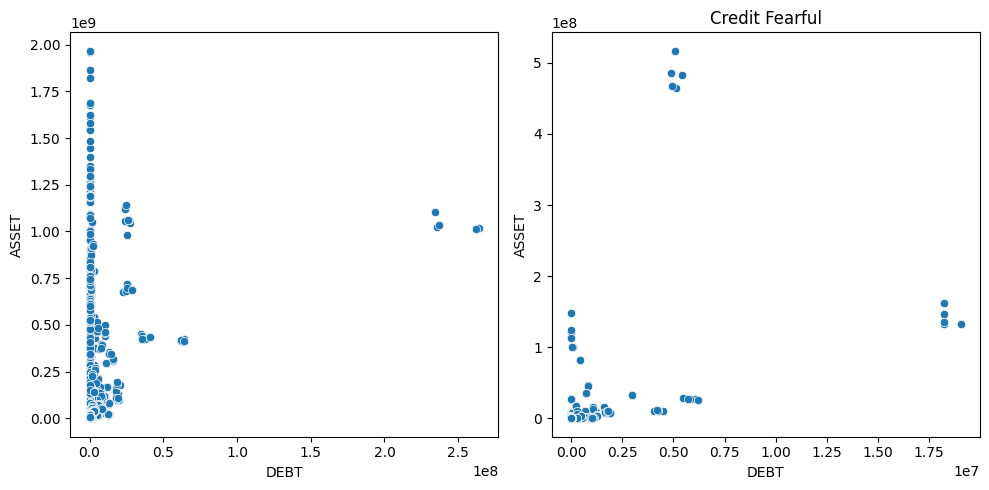

In [134]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x="DEBT",y="ASSET",ax=ax[0])
plt.title("All")

sns.scatterplot(data=df_turnfear,x="DEBT",y="ASSET",ax=ax[1])
plt.title("Credit Fearful")
plt.tight_layout()
plt.show()

we can see that the All graph differ from the credit fear

## Debt & Houses

create a scatter plot to see the difference relation between the debt and houses in boss cases

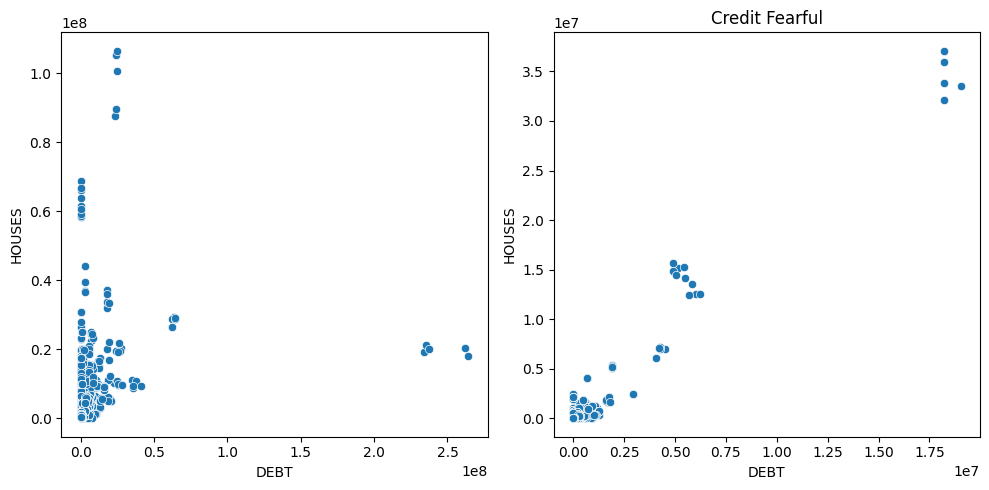

In [135]:
#for all people
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(data=df,x="DEBT",y="HOUSES",ax=ax[0])
plt.title("All")
#for credit fearfull
sns.scatterplot(data=df_turnfear,x="DEBT",y="HOUSES",ax=ax[1])
plt.title("Credit Fearful")
plt.tight_layout()
plt.show()

we can see the difference betwean boss cases in credit fearful case it show the relatoin as stronge positive relation as we know from the heatmap